In [1]:
from DNC_predict import predict_label, pre_matt

from pynwb import NWBHDF5IO 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import os

import PyQt6.QtCore
os.environ["QT_API"] = "pyqt6"

Load template worm and test worm

In [273]:
temp_f = '../Data/Example/template.data'
test_f = '../Data/Example/test.data'
temp = pre_matt(temp_f)  #load python dictinary from a pickle file.
test = pre_matt(test_f)
# template worm contains pts, color(can be None) and label
temp_pos = temp['pts']
temp_label = temp['name']
temp_color = temp['color']
# test worm contains pts, color(can be None)
test_pos = test['pts']
test_color = test['color']
test_gt = test['name']

In [275]:
fig, axs = plt.subplots(1,2)

axs[0].scatter(temp_pos[:,0], temp_pos[:,1])
axs[1].scatter(temp_pos[:,0], temp_pos[:,2])

plt.show()

In [149]:
test = np.load('../Data/train_synthetic/syn_uns_300/syn_300_0.npy')
print(test)

[[-6.93208071e-02  2.40319538e-01  1.44913373e-01  0.00000000e+00]
 [-4.63929428e-03  2.46484208e-01  1.77956973e-01  1.00000000e+00]
 [ 1.74669139e-02  2.56484593e-01  1.52599065e-01  2.00000000e+00]
 [ 5.21038817e-02  2.65676047e-01  1.17395519e-01  3.00000000e+00]
 [-9.01775969e-02  1.65069811e-01  1.24905515e-01  4.00000000e+00]
 [-4.04805067e-02  2.38271666e-01  1.45909151e-01  5.00000000e+00]
 [ 6.88952289e-04  3.16501924e-01  1.26049839e-01  6.00000000e+00]
 [-9.19779088e-02 -4.83550596e-02  1.19747932e-01  7.00000000e+00]
 [-1.43684553e-01  1.55632736e-01  8.27226338e-02  8.00000000e+00]
 [-1.20138228e-01  3.76654416e-02  8.28870000e-02  9.00000000e+00]
 [-7.51663439e-02  1.54109716e-02  9.00522251e-02  1.00000000e+01]
 [ 4.69898123e-02  2.06391917e-01  1.06028122e-01  1.10000000e+01]
 [-9.93282723e-02 -1.28995494e-01  9.39873255e-02  1.20000000e+01]
 [ 1.31254811e-01  4.01877052e-01  1.20522700e-01  1.30000000e+01]
 [ 1.28847979e-01  3.72638601e-01  1.19298334e-01  1.40000000e

In [271]:
data = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_1.npy')

In [272]:
print(data[0,:])

[ 1.979225e-01  1.546750e-02 -6.522425e-02  2.400000e+01]


In [137]:
data_labels = data[:,3].astype('int')

print(np.where(data_labels == -1))



(array([ 59,  62,  63,  64,  65,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       116]),)


In [130]:
data_indices = data[:,3].astype('int')
data_indices

test_included_labels = [label for label in test_gt if label!='']
data_labels = [test_included_labels[index] if index != -1 else '' for index in data_indices]
print(data_labels)

IndexError: list index out of range

In [61]:
fig, axs = plt.subplots(2,2)

axs[0,0].scatter(x=test_pos[:,0], y=test_pos[:,1])
axs[0,1].scatter(x=test_pos[:,0], y=test_pos[:,2])
axs[1,0].scatter(x=data[:,0], y=data[:,1])
axs[1,1].scatter(x=data[:,0], y=data[:,2])
plt.show()

In [29]:
fig, axs = plt.subplots(2,2)

axs[0,0].scatter(x=test_pos[:,0], y=test_pos[:,1])
axs[0,1].scatter(x=test_pos[:,0], y=test_pos[:,2])
axs[1,0].scatter(x=temp_pos[:,0], y=temp_pos[:,1])
axs[1,1].scatter(x=temp_pos[:,0], y=temp_pos[:,2])
plt.show()

In [2]:
data_dict = {9: {'matchset':0,'flipx':False},
             7: {'matchset':1,'flipx':False},
             5: {'matchset':2,'flipx':True},
             3: {'matchset':3,'flipx':False},
             1: {'matchset':4,'flipx':True},
             8: {'matchset':5,'flipx':False},
             6: {'matchset':6,'flipx':True},
             4: {'matchset':7,'flipx':True},
             2: {'matchset':8,'flipx':True}}

In [26]:
%matplotlib qt

aligned_path = '/Users/danielysprague/foco_lab/data/aligned_2024_05_01/aligned_full/'

group1 = [3, 7, 8, 9]
group2 = [1, 2, 4, 5, 6]

fig, axs = plt.subplots(2,5)

for i, dataset in enumerate(group1):
    test = pd.read_csv(aligned_path + str(dataset)+'.csv')

    match_ind = data_dict[dataset]['matchset']
    flipx = data_dict[dataset]['flipx']

    match = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_'+str(match_ind)+'.npy')
    xrange = [np.min(match[:,0]), np.max(match[:,0])]
    yrange = [np.min(match[:,1]), np.max(match[:,1])]
    zrange = [np.min(match[:,2]), np.max(match[:,2])]

    test = test.fillna('')

    test_pos = np.asarray(test[['real_X', 'real_Y', 'real_Z']])

    if flipx:
        test_pos[:,0] = - test_pos[:,0]

    test_pos[:,0] = ((test_pos[:,0]-np.min(test_pos[:,0]))/(np.max(test_pos[:,0])-np.min(test_pos[:,0]))) * (xrange[1]-xrange[0]) +xrange[0]
    test_pos[:,1] = ((test_pos[:,1]-np.min(test_pos[:,1]))/(np.max(test_pos[:,1])-np.min(test_pos[:,1]))) * (yrange[1]-yrange[0]) +yrange[0]
    test_pos[:,2] = ((test_pos[:,2]-np.min(test_pos[:,2]))/(np.max(test_pos[:,2])-np.min(test_pos[:,2]))) * (zrange[1]-zrange[0]) +zrange[0]

    test_col = np.asarray(test[['real_R', 'real_G', 'real_B']])
    test_gt = np.asarray(test['ID'])

    axs[0,i].scatter(x=test_pos[:,0], y=test_pos[:,1])
    axs[0,i].set_title('dataset' + str(dataset-1))

for i, dataset in enumerate(group2):
    test = pd.read_csv(aligned_path + str(dataset)+'.csv')

    match_ind = data_dict[dataset]['matchset']
    flipx = data_dict[dataset]['flipx']

    match = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_'+str(match_ind)+'.npy')
    xrange = [np.min(match[:,0]), np.max(match[:,0])]
    yrange = [np.min(match[:,1]), np.max(match[:,1])]
    zrange = [np.min(match[:,2]), np.max(match[:,2])]

    test = test.fillna('')

    test_pos = np.asarray(test[['real_X', 'real_Y', 'real_Z']])

    if flipx:
        test_pos[:,0] = - test_pos[:,0]

    test_pos[:,0] = ((test_pos[:,0]-np.min(test_pos[:,0]))/(np.max(test_pos[:,0])-np.min(test_pos[:,0]))) * (xrange[1]-xrange[0]) +xrange[0]
    test_pos[:,1] = ((test_pos[:,1]-np.min(test_pos[:,1]))/(np.max(test_pos[:,1])-np.min(test_pos[:,1]))) * (yrange[1]-yrange[0]) +yrange[0]
    test_pos[:,2] = ((test_pos[:,2]-np.min(test_pos[:,2]))/(np.max(test_pos[:,2])-np.min(test_pos[:,2]))) * (zrange[1]-zrange[0]) +zrange[0]

    test_col = np.asarray(test[['real_R', 'real_G', 'real_B']])
    test_gt = np.asarray(test['ID'])

    axs[1,i].scatter(x=test_pos[:,0], y=test_pos[:,1])
    axs[1,i].set_title('dataset' + str(dataset-1))

plt.show()


In [5]:
aligned_path = '/Users/danielysprague/foco_lab/data/aligned_2024_05_01/aligned_full/'

template = pd.read_csv(aligned_path + '4.csv')

template = template.fillna('')

temp_pos = np.asarray(template[['real_X', 'real_Y', 'real_Z']])
temp_pos = temp_pos/84 - [1,1,0.2]
temp_col = np.asarray(template[['real_R', 'real_G', 'real_B']])
temp_label = np.asarray(template['ID'])

test = pd.read_csv(aligned_path + '1.csv')

test = test.fillna('')

test_pos = np.asarray(test[['real_X', 'real_Y', 'real_Z']])
test_pos = test_pos/84 - [1,1,0.2]
test_col = np.asarray(test[['real_R', 'real_G', 'real_B']])
test_gt = np.asarray(test['ID'])


In [276]:
accs_pos = np.zeros((9, 9))
accs_col = np.zeros((9,9))

for i in range(1,10):
    temp_file = str(i)+'.csv'

    template = pd.read_csv(aligned_path + temp_file)
    template = template.fillna('')

    match_ind = data_dict[i]['matchset']
    flipx = data_dict[i]['flipx']

    match = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_'+str(match_ind)+'.npy')
    xrange = [np.min(match[:,0]), np.max(match[:,0])]
    yrange = [np.min(match[:,1]), np.max(match[:,1])]
    zrange = [np.min(match[:,2]), np.max(match[:,2])]

    template = template.fillna('')

    temp_pos = np.asarray(template[['real_X', 'real_Y', 'real_Z']])

    if flipx:
        temp_pos[:,0] = - temp_pos[:,0]

    temp_pos[:,0] = ((temp_pos[:,0]-np.min(temp_pos[:,0]))/(np.max(temp_pos[:,0])-np.min(temp_pos[:,0]))) * (xrange[1]-xrange[0]) +xrange[0]
    temp_pos[:,1] = ((temp_pos[:,1]-np.min(temp_pos[:,1]))/(np.max(temp_pos[:,1])-np.min(temp_pos[:,1]))) * (yrange[1]-yrange[0]) +yrange[0]
    temp_pos[:,2] = ((temp_pos[:,2]-np.min(temp_pos[:,2]))/(np.max(temp_pos[:,2])-np.min(temp_pos[:,2]))) * (zrange[1]-zrange[0]) +zrange[0]

    temp_col = np.asarray(template[['real_R', 'real_G', 'real_B']])
    temp_label = np.asarray(template['ID'])

    for j in range(1,10):
        test_file = str(j) + '.csv'
        test = pd.read_csv(aligned_path + test_file)

        match_ind = data_dict[j]['matchset']
        flipx = data_dict[j]['flipx']

        match = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_'+str(match_ind)+'.npy')
        xrange = [np.min(match[:,0]), np.max(match[:,0])]
        yrange = [np.min(match[:,1]), np.max(match[:,1])]
        zrange = [np.min(match[:,2]), np.max(match[:,2])]

        test = test.fillna('')

        test_pos = np.asarray(test[['real_X', 'real_Y', 'real_Z']])

        if flipx:
            test_pos[:,0] = - test_pos[:,0]

        test_pos[:,0] = ((test_pos[:,0]-np.min(test_pos[:,0]))/(np.max(test_pos[:,0])-np.min(test_pos[:,0]))) * (xrange[1]-xrange[0]) +xrange[0]
        test_pos[:,1] = ((test_pos[:,1]-np.min(test_pos[:,1]))/(np.max(test_pos[:,1])-np.min(test_pos[:,1]))) * (yrange[1]-yrange[0]) +yrange[0]
        test_pos[:,2] = ((test_pos[:,2]-np.min(test_pos[:,2]))/(np.max(test_pos[:,2])-np.min(test_pos[:,2]))) * (zrange[1]-zrange[0]) +zrange[0]

        test_col = np.asarray(test[['real_R', 'real_G', 'real_B']])
        test_gt = np.asarray(test['ID'])

        temp_included_labels = [label for label in temp_label if label !='']
        test_included_labels = [label for label in test_gt if label != '']

        labels_both = [label for label in test_included_labels if label in temp_included_labels]

        test_label_col, candidate_list_col = predict_label(temp_pos, temp_label, test_pos, temp_col, 
                                           test_col, cuda=False)
        
        test_label_pos, candidate_list_pos = predict_label(temp_pos, temp_label, test_pos, cuda=False)

        acc_col = np.sum([test_label_col[i][0]==test_gt[i] for i in range(len(test_gt)) if test_label_col[i][0] in labels_both])/len(labels_both)
        acc_pos = np.sum([test_label_pos[i][0]==test_gt[i] for i in range(len(test_gt)) if test_label_pos[i][0] in labels_both])/len(labels_both)

        accs_pos[i-1,j-1] = acc_pos
        accs_col[i-1,j-1] = acc_col


/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False bec

In [279]:
temp = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_1.npy')
print(temp)

[[ 1.9792250e-01  1.5467500e-02 -6.5224250e-02  2.4000000e+01]
 [ 1.8653000e-01  3.3702500e-02  1.2380975e-01  4.0000000e+00]
 [ 1.5458250e-01  8.2415000e-02 -4.3381000e-02  1.0000000e+00]
 [ 1.5100750e-01  9.6367500e-02  6.4249000e-02  0.0000000e+00]
 [ 1.9725500e-01  6.7835000e-02 -5.0865750e-02  3.0000000e+00]
 [ 1.8199750e-01  7.4685000e-02  8.9335250e-02  2.0000000e+00]
 [ 2.0898000e-01 -5.4235000e-02  4.1336500e-02  5.7000000e+01]
 [ 2.2852750e-01  6.6457500e-02 -5.6141500e-02  7.0000000e+01]
 [ 2.3024750e-01 -2.8562500e-02 -1.3359750e-02  5.0000000e+00]
 [ 2.2845000e-01 -1.9812500e-02  6.2122250e-02  6.0000000e+00]
 [ 2.4168000e-01  3.6150000e-03 -3.6777500e-02  7.2000000e+01]
 [ 2.7234500e-01 -3.9750000e-04 -1.6755500e-02  1.3000000e+01]
 [ 2.6660750e-01  9.1000000e-04  5.4120500e-02  1.2000000e+01]
 [ 2.5531250e-01  2.8497500e-02 -6.0124750e-02  1.0000000e+01]
 [ 2.6332250e-01  3.8265000e-02  1.1470350e-01  9.0000000e+00]
 [ 2.0292750e-01  1.1521750e-01  4.1113250e-02  1.40000

In [2]:
accs_pos = np.zeros(8)

test_files = [0,2,3,4,5,6,7,8]

temp = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_1.npy')
temp_pos = temp[:, :3]
temp_gt = temp[:,3]

for j in range(len(test_files)):
    print(test_files[j])

    test = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_'+str(test_files[j])+'.npy')

    test_pos = test[:,:3]
    test_gt = test[:,3]

    temp_included_labels = [label for label in temp_gt if label !=-1]
    test_included_labels = [label for label in test_gt if label !=-1]

    labels_both = [label for label in test_included_labels if label in temp_included_labels]
    
    test_label_pos, candidate_list_pos = predict_label(temp_pos, temp_gt, test_pos, cuda=False, model_path = '../model/nitReg_nh128_nl6_ft1_dataNP_corp_elam_0.1_632.bin', p_rotate=1, feat_trans=1 )
    print(len(labels_both))
    print(np.sum([test_label_pos[i][0]==test_gt[i] for i in range(len(test_gt)) if test_label_pos[i][0] in labels_both]))

    acc_pos = np.sum([test_label_pos[i][0]==test_gt[i] for i in range(len(test_gt)) if test_label_pos[i][0] in labels_both])/len(labels_both)

    accs_pos[j] = acc_pos

print(accs_pos)


0
59
25
2


/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Users/danielysprague/foco_lab/fDNC_Neuron_ID/src/model.py:634: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:277.)
  sents_var = torch.tensor(sents_padded, dtype=torch.float, device=self.device)


50
9
3
55
5
4
47
7
5
54
4
6
52
11
7
49
7
8
38
19
[0.42372881 0.18       0.09090909 0.14893617 0.07407407 0.21153846
 0.14285714 0.5       ]


In [277]:
accs_col

array([[1.        , 0.86      , 0.14285714, 0.81481481, 0.80769231,
        0.77777778, 0.10638298, 0.08888889, 0.08510638],
       [0.88      , 1.        , 0.18181818, 0.87755102, 0.8125    ,
        0.76595745, 0.13157895, 0.13888889, 0.10526316],
       [0.14285714, 0.15151515, 1.        , 0.11111111, 0.08510638,
        0.09615385, 0.76363636, 0.76271186, 0.85714286],
       [0.77777778, 0.91836735, 0.11111111, 1.        , 0.87719298,
        0.85714286, 0.06122449, 0.10638298, 0.1       ],
       [0.78846154, 0.8125    , 0.08510638, 0.89473684, 1.        ,
        0.82142857, 0.1       , 0.08163265, 0.08      ],
       [0.83333333, 0.74468085, 0.11538462, 0.85714286, 0.82142857,
        1.        , 0.05769231, 0.1509434 , 0.09090909],
       [0.12765957, 0.13157895, 0.70909091, 0.08163265, 0.1       ,
        0.07692308, 1.        , 0.74074074, 0.72881356],
       [0.11111111, 0.13888889, 0.76271186, 0.08510638, 0.10204082,
        0.11320755, 0.81481481, 1.        , 0.82758621],


In [278]:
sns.heatmap(accs_col)
plt.xlabel('test')
plt.ylabel('template')

plt.show()

In [15]:
accs_pos

array([[1.        , 0.76      , 0.0952381 , 0.74074074, 0.61538462,
        0.74074074, 0.08510638, 0.11111111, 0.10638298],
       [0.8       , 1.        , 0.15151515, 0.7755102 , 0.77083333,
        0.78723404, 0.10526316, 0.13888889, 0.07894737],
       [0.07142857, 0.15151515, 1.        , 0.06666667, 0.08510638,
        0.07692308, 0.76363636, 0.6779661 , 0.73214286],
       [0.75925926, 0.79591837, 0.06666667, 1.        , 0.84210526,
        0.78571429, 0.12244898, 0.08510638, 0.1       ],
       [0.65384615, 0.72916667, 0.10638298, 0.8245614 , 1.        ,
        0.76785714, 0.12      , 0.08163265, 0.06      ],
       [0.72222222, 0.82978723, 0.09615385, 0.71428571, 0.76785714,
        1.        , 0.07692308, 0.11320755, 0.07272727],
       [0.08510638, 0.10526316, 0.78181818, 0.12244898, 0.12      ,
        0.05769231, 1.        , 0.77777778, 0.81355932],
       [0.11111111, 0.11111111, 0.6779661 , 0.08510638, 0.08163265,
        0.11320755, 0.72222222, 1.        , 0.70689655],


In [22]:
sns.heatmap(accs_pos)
plt.xlabel('test')
plt.ylabel('template')

plt.show()

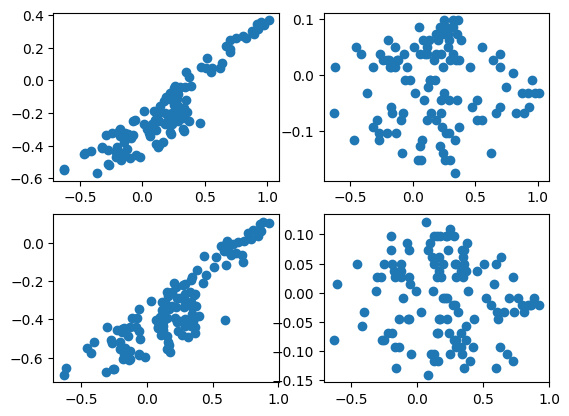

In [199]:
fig, axs = plt.subplots(2,2)

axs[0,0].scatter(x=test_pos[:,0], y=test_pos[:,1])
axs[0,1].scatter(x=test_pos[:,0], y=test_pos[:,2])
axs[1,0].scatter(x=temp_pos[:,0], y=temp_pos[:,1])
axs[1,1].scatter(x=temp_pos[:,0], y=temp_pos[:,2])
plt.show()

In [307]:
accs_pos = np.zeros(9)
accs_col = np.zeros(9)

pair_matches = np.zeros(9)

temp_f = '../Data/Example/template.data'
temp = pre_matt(temp_f)  #load python dictinary from a pickle file.
# template worm contains pts, color(can be None) and label
temp_pos = temp['pts']
temp_label = temp['name']
temp_col = temp['color']

for j in range(1,10):
    test_file = str(j) + '.csv'
    test = pd.read_csv(aligned_path + test_file)

    test = test.fillna('')

    test_pos = np.asarray(test[['real_X', 'real_Y', 'real_Z']])
    test_pos = test_pos/84 - [1,1,0.2]
    test_col = np.asarray(test[['real_R', 'real_G', 'real_B']])
    test_gt = np.asarray(test['ID'])

    temp_included_labels = [label for label in temp_label if label !='']
    test_included_labels = [label for label in test_gt if label != '']

    labels_both = [label for label in test_included_labels if label in temp_included_labels]

    test_label_col, candidate_list_col = predict_label(temp_pos, temp_label, test_pos, temp_col, 
                                        test_col, cuda=False)
    
    test_label_pos, candidate_list_pos = predict_label(temp_pos, temp_label, test_pos, cuda=False)

    pair_matches[j-1] = len(labels_both)

    acc_col = np.sum([test_label_col[i][0]==test_gt[i] for i in range(len(test_gt)) if test_label_col[i][0] in labels_both])/len(labels_both)
    acc_pos = np.sum([test_label_pos[i][0]==test_gt[i] for i in range(len(test_gt)) if test_label_pos[i][0] in labels_both])/len(labels_both)

    accs_pos[j-1] = acc_pos
    accs_col[j-1] = acc_col

/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False bec

In [308]:
print(np.mean(pair_matches))

45.333333333333336


In [305]:
accs_col

array([0.04545455, 0.02631579, 0.36956522, 0.        , 0.02222222,
       0.        , 0.32608696, 0.36956522, 0.40816327])

In [200]:
# the model can works with/without gpu(cuda=True/False)
# Requires template positions vector, template labels, test positions, test colors, template colors as input

test_label, candidate_list = predict_label(temp_pos, temp_label, test_pos, temp_col, 
                                           test_col, cuda=False)

/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [288]:
# the model can works with/without gpu(cuda=True/False)
# Requires template positions vector, template labels, test positions, test colors, template colors as input

test_label, candidate_list = predict_label(test_pos, test_gt, data, cuda=False)

/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


test_label saves the label assigned with our fDLC model together with the confidence for that assignment.

In [289]:
temp_included_labels = [label for label in data_labels if label !='']
test_included_labels = [label for label in test_gt if label != '']

labels_both = [label for label in test_included_labels if label in temp_included_labels]
print(labels_both)

acc = np.sum([test_label[i][0]==test_gt[i] for i in range(len(test_gt)) if test_label[i][0] in labels_both])/len(labels_both)
print(acc)

['CEPVR', 'CEPVL', 'OLQVR', 'OLQVL', 'RMER', 'OLQDL', 'OLQDR', 'URYDR', 'URYVR', 'OLLR', 'OLLL', 'URADL', 'IL1DR', 'IL1DL', 'IL1VR', 'IL1VL', 'IL2R', 'M3R', 'IL2VR', 'IL2VL', 'IL2DR', 'IL2DL', 'I2R', 'I2L', 'RMEL', 'IL2L', 'ALA', 'CEPDR', 'URXR', 'URXL', 'RMDVR', 'AVAR', 'AVER', 'RMDR', 'RMDVL', 'AVAL', 'AVEL', 'AFDR', 'RMDDR', 'RMDDL', 'AIBR', 'AUAR', 'RIMR', 'AVDR', 'AIZR', 'AINR', 'AVJR', 'ASHR', 'AWBR', 'AWAR', 'M1', 'FLPR', 'DD1', 'ADER', 'I1R', 'I3', 'I1L', 'RMED', 'RMEV', 'ASJR', 'VD2', 'M3L']
0.06451612903225806


In [290]:
test_label

[('FLPR', 0.00060202024),
 ('', 0.00017312766),
 ('URYVR', 1.3937366e-05),
 ('IL2VL', 5.045728e-06),
 ('URYDR', 0.00012215508),
 ('URXL', 0.11202781),
 ('AINR', 0.0027589847),
 ('URXR', 0.06254504),
 ('', 0.00029480385),
 ('', 0.028302943),
 ('OLQVL', 3.69502e-05),
 ('', 0.06602141),
 ('CEPDR', 0.10203829),
 ('', 0.014543466),
 ('IL2VR', 1.21221965e-05),
 ('', 9.586981e-05),
 ('', 0.00042596235),
 ('', 0.00077518064),
 ('IL1VR', 3.4888035e-05),
 ('IL1VL', 1.6682812e-05),
 ('', 0.02215803),
 ('', 0.043253414),
 ('RMDVR', 0.0014770648),
 ('AVAL', 0.0058485856),
 ('', 0.0002874706),
 ('RMEL', 0.0005788716),
 ('ALA', 0.07753082),
 ('', 0.030250246),
 ('', 0.016290355),
 ('OLQDL', 0.0023954015),
 ('IL2R', 2.2179885e-05),
 ('OLLR', 3.6244182e-05),
 ('ADER', 0.00053420645),
 ('M3R', 1.8908126e-05),
 ('', 0.0009277796),
 ('', 0.0037888635),
 ('IL2L', 1.3507464e-05),
 ('URADL', 6.0771446e-05),
 ('IL1DL', 0.00031762753),
 ('M3L', 1.1591442e-05),
 ('', 0.00041427187),
 ('AVAR', 0.0025156797),
 ('

The candidate_list gives the top 5 labels for the neuron together with their confidence.

In [203]:
candidate_list

[[('CEPVR', 0.37707920066742123),
  ('', 0.24875883236231566),
  ('', 0.24809740240895278),
  ('AIZR', 0.10370903824996046),
  ('RMDDL', 0.01785043243464386)],
 [('CEPVR', 0.3804439469974349),
  ('', 0.31361349492831375),
  ('RMDDL', 0.15460209370526826),
  ('', 0.09804024356788724),
  ('', 0.04643691115563519)],
 [('', 0.8779531032154765),
  ('OLQVR', 0.1213490191121446),
  ('OLQDR', 0.00028884571359964105),
  ('OLQVL', 0.00012231150000710026),
  ('URXL', 8.464673269896304e-05)],
 [('OLQVL', 0.7582122568709236),
  ('', 0.20340255355993128),
  ('', 0.020280465751984368),
  ('OLQVR', 0.007850134849601086),
  ('M3L', 0.004854745338204854)],
 [('AVJR', 0.5117414766449513),
  ('', 0.4813140313295493),
  ('RICR', 0.004692266963611751),
  ('', 0.0007613717419786013),
  ('', 0.0005885248999326137)],
 [('OLQDL', 0.4807065077740375),
  ('OLQVL', 0.43014142215189277),
  ('M3L', 0.02666322584783361),
  ('', 0.023699360888690065),
  ('', 0.020006894836644428)],
 [('URXL', 0.8147418721912493),
  ('

Plot template worm with Label

In [204]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
sc = ax.scatter(temp_pos[:, 0], temp_pos[:, 1], temp_pos[:, 2], s=100, alpha=0.9, marker='o')
for i in range(len(temp_pos)):
    ax.text(temp_pos[i, 0], temp_pos[i, 1], temp_pos[i, 2], temp_label[i], fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('template worm')


Text(0.5, 0.92, 'template worm')

<Figure size 640x480 with 0 Axes>

Plot test worm with label predicted by model

In [206]:
fig = plt.figure()
ax = Axes3D(fig)
sc = ax.scatter(test_pos[:, 0], test_pos[:, 1], test_pos[:, 2], s=100, alpha=0.9, marker='o')
for i in range(len(test_pos)):
    ax.text(test_pos[i, 0], test_pos[i, 1], test_pos[i, 2], test_label[i][0], fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('test worm')

Text(0.5, 0.92, 'test worm')

<Figure size 640x480 with 0 Axes>

### Plot test synthetic data

In [222]:
#data = np.load('../Data/train_synthetic/syn_uns_300/syn_300_0.npy')
#data2 = np.load('../Data/train_synthetic/syn_uns_300/syn_300_20.npy')

data = np.load('../Data/train_new/4/4_batch10/syn_4_batch10_25.npy')
data2 = np.load('../Data/train_new/1/1_batch10/syn_1_batch10_40.npy')

print(data[:,3])

fig, axs = plt.subplots(2,2)

axs[0,0].scatter(data[:,0], data[:,1])
axs[0,1].scatter(data[:,0], data[:,2])
axs[1,0].scatter(data2[:,0], data2[:,1])
axs[1,1].scatter(data2[:,0], data2[:,2])

plt.show()


[  0.   1.   2.   3.   4.   5.   6.   7.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  20.  21.  22.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  67.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  80.  81.  82.  83.  84.  85.  86.  87.  88.
  89.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103.
 104. 105. 108. 109. 110. 111. 114. 115. 116. 117. 118. 119. 120. 121.]


In [196]:
data = np.load('../Data/train_new/1/1_batch10/syn_1_batch10_25.npy')

print(data[:,3])

fig, axs = plt.subplots(1,2)

axs[0].scatter(data[:,0], data[:,1])
axs[1].scatter(data[:,0], data[:,2])

plt.show()


[  0.   1.   2.   4.   5.   6.   9.  10.  12.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  31.  32.
  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.
  47.  48.  49.  50.  51.  53.  54.  55.  56.  57.  58.  59.  61.  62.
  63.  64.  66.  67.  68.  69.  70.  71.  72.  73.  75.  76.  77.  78.
  79.  80.  81.  82.  83.  85.  86.  87.  88.  90.  91.  92.  93.  94.
  95.  96.  98. 100. 101. 102. 103. 104. 106. 108. 109. 114. 115. 116.
 117. 118. 119. 120. 122. 123. 125. 126. 128. 129. 130. 131. 132. 133.
 135. 136. 137. 139. 140. 141. 142. 143. 144. 146. 147. 148. 149. 150.
 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 163. 165. 166.
 167. 168. 169. 171. 172. 173. 174. 175. 176. 177. 178. 180. 181. 182.
 186. 187. 188. 189. 190. 191.  -2.  -2.]


In [202]:
temp = np.load('../Data/train_synthetic/syn_uns_300/syn_300_0.npy')
test = np.load('../Data/train_synthetic/syn_uns_300/syn_300_20.npy')

temp_pos = temp[:,:3]
temp_label = temp[:,3]
test_pos = test[:,:3]
test_gt = test[:,3]

print(test_gt)
print(temp_label)

test_label_pos, candidate_list_pos = predict_label(temp_pos, temp_label, test_pos, cuda=False)

print(test_label_pos)

acc_pos = np.sum([test_label_pos[i][0]==test_gt[i] for i in range(len(test_gt))])/np.sum([test_gt!=0])

print(acc_pos)

[ 0.  1.  2.  4.  5.  6.  7.  8.  9. 10. 11. 13. 15. 17. 18. 19. 20. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.
 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 75. 76. 77. 78. 79. 81. 82.
 83. 84. 85. 86. 87. 88. 89. 90. 91. 93. 94. 95. 96. 98. 99. -2. -2.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 21. 22. 23. 25. 26. 27. 28. 29. 30. 31. 32. 33. 35. 36. 37. 38.
 39. 40. 41. 42. 43. 45. 47. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 70. 71. 73. 74. 75. 77. 78. 79. 80. 81.
 82. 84. 85. 86. 87. 88. 89. 90. 91. 92. 94. 95. 96. 97. 98. 99. -2. -2.
 -2.]
[(0.0, 0.9985832), (1.0, 0.999997), (2.0, 0.9999223), (4.0, 1.0), (5.0, 0.99980813), (6.0, 1.0), (7.0, 1.0), (8.0, 1.0), (9.0, 1.0), (10.0, 0.99998593), (16.0, 0.9608099), (13.0, 0.9948249), (15.0, 0.9999988), (17.0, 1.0), (18.0, 0.9960782), (19.0, 0.9981048), (21.0,

In [226]:
temp = np.load('../Data/train_new_lowrot/1/1_batch10/syn_1_batch10_10.npy')
test = np.load('../Data/train_new_lowrot/1/1_batch10/syn_1_batch10_45.npy')

temp_pos = temp[:,:3]
temp_label = temp[:,3]
test_pos = test[:,:3]
test_gt = test[:,3]

print(test_gt)
print(temp_label)

test_label_pos, candidate_list_pos = predict_label(temp_pos, temp_label, test_pos, cuda=False)

print(test_label_pos)

acc_pos = np.sum([test_label_pos[i][0]==test_gt[i] for i in range(len(test_gt))])/len(test_gt)

print(acc_pos)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  25.  27.  28.  29.  32.  33.
  35.  36.  37.  39.  40.  42.  43.  44.  45.  46.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  58.  59.  60.  61.  62.  63.  64.  65.
  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.
  81.  82.  85.  86.  87.  89.  90.  92.  93.  95.  96.  97.  98.  99.
 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.]
[  0.   2.   3.   5.   7.   8.   9.  10.  11.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.
  35.  36.  37.  39.  40.  44.  45.  46.  47.  48.  49.  50.  51.  52.
  53.  54.  55.  56.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  69.  72.  73.  74.  75.  76.  77.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.
 102. 103. 107. 108. 109. 110. 111. 112.  -2.]
[(0.0, 0.6627702), (24.0, 0.0040545333)

The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window 

In [187]:
csvfile = pd.read_csv('/Users/danielysprague/foco_lab/data/aligned_2024_03_11/aligned_full/4.csv')

data = np.asarray(csvfile[['aligned_x', 'aligned_y', 'aligned_z']])

fig, axs = plt.subplots(1,2)

axs[0].scatter(data[:,0], data[:,1])
axs[1].scatter(data[:,0], data[:,2])

plt.show()


In [170]:
data = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_4.npy')

fig, axs = plt.subplots(1,2)

axs[0].scatter(data[:,0], data[:,1])
axs[1].scatter(data[:,0], data[:,2])

plt.show()

## Test with experimental data from other labs

In [63]:
skip_files = ['20231013-9-30-0', '20230412-20-15-17', '2023-01-23-01', '20239828-11-14-0', '2023-01-05-01', '2023-01-10-14', '2022-06-28-07', '2022-07-26-01', '2023-01-19-15', '2022-07-15-06', '2022-08-02-01', '2023-01-09-08', '2023-01-09-28', '2023-01-10-14', '2023-01-17-14', '2023-01-19-22', '2023-01-23-01']

In [69]:
NP_og_files = sorted([file[:-4] for file in os.listdir('/Users/danielysprague/foco_lab/data/final_nwb/NP_og') if (file != '.DS_Store') and (file[:-4] not in skip_files)])
EY_files = sorted([file[:-4] for file in os.listdir('/Users/danielysprague/foco_lab/data/final_nwb/EY') if (file != '.DS_Store') and (file[:-4] not in skip_files)])
HL_files = sorted([file[:-4] for file in os.listdir('/Users/danielysprague/foco_lab/data/final_nwb/HL') if (file != '.DS_Store') and (file[:-4] not in skip_files)])
SK1_files = sorted([file[:-4] for file in os.listdir('/Users/danielysprague/foco_lab/data/final_nwb/SK1') if (file != '.DS_Store') and (file[:-4] not in skip_files)])
SK2_files = sorted([file[:-4] for file in os.listdir('/Users/danielysprague/foco_lab/data/final_nwb/SK2') if (file != '.DS_Store') and (file[:-4] not in skip_files)])
KK_files = sorted([file[:-4] for file in os.listdir('/Users/danielysprague/foco_lab/data/final_nwb/KK') if (file != '.DS_Store') and (file[:-4] not in skip_files)])
SF_files = sorted([file[:-4] for file in os.listdir('/Users/danielysprague/foco_lab/data/final_nwb/SF') if (file != '.DS_Store') and (file[:-4] not in skip_files)])

In [ ]:
def gen_acc_heatmap(aligned_path, temp_files, test_files, model_path):
    temp_files = NP_og_files + EY_files + HL_files + SK1_files + SK2_files + KK_files + SF_files
    test_files = NP_og_files + EY_files + HL_files + SK1_files + SK2_files + KK_files + SF_files

    accs_pos = np.zeros((len(temp_files), len(test_files)))
    accs_col = np.zeros((len(temp_files), len(test_files)))

    for i, file in enumerate(temp_files):
        csv_file = file +'.csv'

        template = pd.read_csv(aligned_path + csv_file)
        template = template.fillna('')

        match = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_5.npy') # match to some arbitrary example
        xrange = [np.min(match[:,0]), np.max(match[:,0])]
        yrange = [np.min(match[:,1]), np.max(match[:,1])]
        zrange = [np.min(match[:,2]), np.max(match[:,2])]

        template = template.fillna('')

        temp_pos = np.asarray(template[['real_X', 'real_Y', 'real_Z']])

        temp_pos[:,0] = ((temp_pos[:,0]-np.min(temp_pos[:,0]))/(np.max(temp_pos[:,0])-np.min(temp_pos[:,0]))) * (xrange[1]-xrange[0]) +xrange[0]
        temp_pos[:,1] = ((temp_pos[:,1]-np.min(temp_pos[:,1]))/(np.max(temp_pos[:,1])-np.min(temp_pos[:,1]))) * (yrange[1]-yrange[0]) +yrange[0]
        temp_pos[:,2] = ((temp_pos[:,2]-np.min(temp_pos[:,2]))/(np.max(temp_pos[:,2])-np.min(temp_pos[:,2]))) * (zrange[1]-zrange[0]) +zrange[0]

        temp_col = np.asarray(template[['real_R', 'real_G', 'real_B']])
        temp_label = np.asarray(template['ID'])

        for j, file_test in enumerate(test_files):
            test_csv = file_test + '.csv'
            test = pd.read_csv(aligned_path + test_csv)

            match = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_'+str(match_ind)+'.npy')
            xrange = [np.min(match[:,0]), np.max(match[:,0])]
            yrange = [np.min(match[:,1]), np.max(match[:,1])]
            zrange = [np.min(match[:,2]), np.max(match[:,2])]

            test = test.fillna('')

            test_pos = np.asarray(test[['real_X', 'real_Y', 'real_Z']])

            test_pos[:,0] = ((test_pos[:,0]-np.min(test_pos[:,0]))/(np.max(test_pos[:,0])-np.min(test_pos[:,0]))) * (xrange[1]-xrange[0]) +xrange[0]
            test_pos[:,1] = ((test_pos[:,1]-np.min(test_pos[:,1]))/(np.max(test_pos[:,1])-np.min(test_pos[:,1]))) * (yrange[1]-yrange[0]) +yrange[0]
            test_pos[:,2] = ((test_pos[:,2]-np.min(test_pos[:,2]))/(np.max(test_pos[:,2])-np.min(test_pos[:,2]))) * (zrange[1]-zrange[0]) +zrange[0]

            test_col = np.asarray(test[['real_R', 'real_G', 'real_B']])
            test_gt = np.asarray(test['ID'])

            temp_included_labels = [label for label in temp_label if label !='']
            test_included_labels = [label for label in test_gt if label != '']

            labels_both = [label for label in test_included_labels if label in temp_included_labels]

            test_label_col, candidate_list_col = predict_label(temp_pos, temp_label, test_pos, temp_col, 
                                            test_col, cuda=False)
            
            test_label_pos, candidate_list_pos = predict_label(temp_pos, temp_label, test_pos, cuda=False)

            acc_col = np.sum([test_label_col[i][0]==test_gt[i] for i in range(len(test_gt))])/np.sum([test_gt!=''])
            acc_pos = np.sum([test_label_pos[i][0]==test_gt[i] for i in range(len(test_gt))])/np.sum([test_gt!=''])

            accs_pos[i,j] = acc_pos
            accs_col[i,j] = acc_col

    return accs_pos, accs_col

In [126]:
temp_files = NP_og_files + EY_files + HL_files + SK1_files + SK2_files + KK_files + SF_files
test_files = NP_og_files + EY_files + HL_files + SK1_files + SK2_files + KK_files + SF_files

accs_pos = np.zeros((len(temp_files), len(test_files)))
accs_col = np.zeros((len(temp_files), len(test_files)))

for i, file in enumerate(temp_files):
    csv_file = file +'.csv'

    template = pd.read_csv(aligned_path + csv_file)
    template = template.fillna('')

    match = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_5.npy') # match to some arbitrary example
    xrange = [np.min(match[:,0]), np.max(match[:,0])]
    yrange = [np.min(match[:,1]), np.max(match[:,1])]
    zrange = [np.min(match[:,2]), np.max(match[:,2])]

    template = template.fillna('')

    temp_pos = np.asarray(template[['real_X', 'real_Y', 'real_Z']])

    temp_pos[:,0] = ((temp_pos[:,0]-np.min(temp_pos[:,0]))/(np.max(temp_pos[:,0])-np.min(temp_pos[:,0]))) * (xrange[1]-xrange[0]) +xrange[0]
    temp_pos[:,1] = ((temp_pos[:,1]-np.min(temp_pos[:,1]))/(np.max(temp_pos[:,1])-np.min(temp_pos[:,1]))) * (yrange[1]-yrange[0]) +yrange[0]
    temp_pos[:,2] = ((temp_pos[:,2]-np.min(temp_pos[:,2]))/(np.max(temp_pos[:,2])-np.min(temp_pos[:,2]))) * (zrange[1]-zrange[0]) +zrange[0]

    temp_col = np.asarray(template[['real_R', 'real_G', 'real_B']])
    temp_label = np.asarray(template['ID'])

    for j, file_test in enumerate(test_files):
        test_csv = file_test + '.csv'
        test = pd.read_csv(aligned_path + test_csv)

        match = np.load('../Data/test_neuropal_Chaudhary/real_worm/real_'+str(match_ind)+'.npy')
        xrange = [np.min(match[:,0]), np.max(match[:,0])]
        yrange = [np.min(match[:,1]), np.max(match[:,1])]
        zrange = [np.min(match[:,2]), np.max(match[:,2])]

        test = test.fillna('')

        test_pos = np.asarray(test[['real_X', 'real_Y', 'real_Z']])

        test_pos[:,0] = ((test_pos[:,0]-np.min(test_pos[:,0]))/(np.max(test_pos[:,0])-np.min(test_pos[:,0]))) * (xrange[1]-xrange[0]) +xrange[0]
        test_pos[:,1] = ((test_pos[:,1]-np.min(test_pos[:,1]))/(np.max(test_pos[:,1])-np.min(test_pos[:,1]))) * (yrange[1]-yrange[0]) +yrange[0]
        test_pos[:,2] = ((test_pos[:,2]-np.min(test_pos[:,2]))/(np.max(test_pos[:,2])-np.min(test_pos[:,2]))) * (zrange[1]-zrange[0]) +zrange[0]

        test_col = np.asarray(test[['real_R', 'real_G', 'real_B']])
        test_gt = np.asarray(test['ID'])

        temp_included_labels = [label for label in temp_label if label !='']
        test_included_labels = [label for label in test_gt if label != '']

        labels_both = [label for label in test_included_labels if label in temp_included_labels]

        test_label_col, candidate_list_col = predict_label(temp_pos, temp_label, test_pos, temp_col, 
                                           test_col, cuda=False)
        
        test_label_pos, candidate_list_pos = predict_label(temp_pos, temp_label, test_pos, cuda=False)

        acc_col = np.sum([test_label_col[i][0]==test_gt[i] for i in range(len(test_gt))])/np.sum([test_gt!=''])
        acc_pos = np.sum([test_label_pos[i][0]==test_gt[i] for i in range(len(test_gt))])/np.sum([test_gt!=''])

        accs_pos[i,j] = acc_pos
        accs_col[i,j] = acc_col


/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Applications/anaconda3/envs/fDNC/lib/python3.11/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False bec

The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.
The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.


In [102]:
accs_col_temp = np.zeros(accs_col.shape)

accs_col_temp[1:,1:] = accs_col[0:103,0:103]
accs_col_temp[0,1:] = accs_col[-1,:-1]
accs_col_temp[1:,0] = accs_col[:-1,-1]
accs_col_temp[0,0] = accs_col[-1,-1]


In [264]:
accs_col = accs_col_temp

In [260]:
np.max(accs_col)

4.7368421052631575

In [265]:
fig, axs = plt.subplots()

sns.heatmap(accs_col_temp)
plt.xlabel('test')
plt.ylabel('template')

plt.show()

In [266]:
best_temps = {}
max_accs = {}
avg_accs = {}
accs = pd.DataFrame(columns=['filename', 'max_acc', 'avg_acc'])

for i in range(accs_col.shape[0]):
    test_file = test_files[i]

    test_accs = accs_col[:,i]

    max_acc = np.max([test_accs[j] for j in range(accs_col.shape[0]) if j!= i])
    avg_acc = np.average([test_accs[j] for j in range(accs_col.shape[0]) if j!= i])

    high_acc_temps = [j for j in range(accs_col.shape[0]) if test_accs[j]>0.5 and j!=i]

    high_acc_datasets = [test_files[j] for j in high_acc_temps]

    best_temps[test_file] = high_acc_datasets
    max_accs[test_file] = max_acc
    avg_accs[test_file] = avg_acc

    accs.loc[len(accs)] = {'filename':test_file, 'max_acc':max_acc, 'avg_acc':avg_acc}


In [232]:
avg_accs

{'11_YAaLR': 0.04220534232104232,
 '20_YAaLR': 0.03741909385113268,
 '38_YAaDV': 0.07037550726871115,
 '55_YAaDV': 0.052892394822006486,
 '56_YAaDV': 0.060194174757281546,
 '62_YAaLR': 0.04666457876605075,
 '64_YAaDV': 0.07325217033954898,
 '70_YAaLR': 0.04049499471804417,
 '76_YAaDV': 0.07266060731253873,
 '7_YAaLR': 0.05262342491220821,
 '20190924_01': 0.05194174757281553,
 '20190924_02': 0.05323256840247131,
 '20190924_03': 0.05688054031236809,
 '20190925_01': 0.04902912621359222,
 '20190925_04': 0.06818181818181819,
 '20190928_01': 0.04434997414833112,
 '20190928_03': 0.07610022673100401,
 '20190928_05': 0.0708027468624201,
 '20190928_07': 0.055377772956554765,
 '20190928_08': 0.06949970820733196,
 '20190928_11': 0.08556853710712524,
 '20190928_13': 0.07572815533980583,
 '20190929_02': 0.03190859578498697,
 '20190929_03': 0.047545076282940364,
 '20190929_05': 0.05409153952843275,
 '20190929_06': 0.05570041608876561,
 '20190929_07': 0.03298764342453662,
 '20191030_03': 0.08327109783

In [122]:
max_accs

{'11_YAaLR': 0.4583333333333333,
 '20_YAaLR': 0.4076086956521739,
 '38_YAaDV': 0.5513513513513514,
 '55_YAaDV': 0.4919786096256685,
 '56_YAaDV': 0.4810810810810811,
 '62_YAaLR': 0.4702702702702703,
 '64_YAaDV': 0.6032608695652174,
 '70_YAaLR': 0.43386243386243384,
 '76_YAaDV': 0.5652173913043478,
 '7_YAaLR': 0.4891304347826087,
 '20190924_01': 0.3888888888888889,
 '20190924_02': 0.25301204819277107,
 '20190924_03': 0.27932960893854747,
 '20190925_01': 0.2947976878612717,
 '20190925_04': 0.41040462427745666,
 '20190928_01': 0.35714285714285715,
 '20190928_03': 0.5269461077844312,
 '20190928_05': 0.3067484662576687,
 '20190928_07': 0.39766081871345027,
 '20190928_08': 0.5260115606936416,
 '20190928_11': 0.6046511627906976,
 '20190928_13': 0.46551724137931033,
 '20190929_02': 0.15,
 '20190929_03': 0.28488372093023256,
 '20190929_05': 0.3475609756097561,
 '20190929_06': 0.3253012048192771,
 '20190929_07': 0.19428571428571428,
 '20191030_03': 0.5416666666666666,
 '20191030_07': 0.3167701863

In [242]:
print([x for x in max_accs.values()])

[0.45595854922279794, 0.390625, 0.5502645502645502, 0.4791666666666667, 0.47368421052631576, 0.46774193548387094, 0.5925925925925926, 0.42487046632124353, 0.5585106382978723, 0.4787234042553192, 0.3888888888888889, 0.24431818181818182, 0.2717391304347826, 0.2833333333333333, 0.4034090909090909, 0.15384615384615385, 0.5269461077844312, 0.31097560975609756, 0.37988826815642457, 0.4972677595628415, 0.519774011299435, 0.46285714285714286, 0.11585365853658537, 0.28, 0.3392857142857143, 0.30857142857142855, 0.19318181818181818, 0.4945054945054945, 0.2914285714285714, 0.519774011299435, 0.40229885057471265, 1.3225806451612903, 1.5, 1.375, 1.5396825396825398, 1.46875, 1.1940298507462686, 1.303030303030303, 1.0, 1.391304347826087, 1.0454545454545454, 1.6666666666666667, 1.02, 0.9245283018867925, 0.8125, 1.4565217391304348, 1.3409090909090908, 1.6470588235294117, 1.5476190476190477, 0.9574468085106383, 0.8235294117647058, 1.6666666666666667, 0.9545454545454546, 1.0408163265306123, 1.413043478260

In [249]:
accs

filename   max_acc   avg_acc
0         11_YAaLR  0.455959  0.042205
1         20_YAaLR  0.390625  0.037419
2         38_YAaDV  0.550265  0.070376
3         55_YAaDV  0.479167  0.052892
4         56_YAaDV  0.473684  0.060194
..             ...       ...       ...
99   2023-01-19-08  0.714286  0.349713
100  2023-01-23-08  0.719298  0.260603
101  2023-01-23-15  0.697368  0.258815
102  2023-01-23-21  0.720000  0.255534
103  2023-03-07-01  0.543860  0.252768

[104 rows x 3 columns]

In [256]:
print(accs['max_acc'][5])

0.46774193548387094


In [269]:
fig, axs = plt.subplots()
sns.violinplot(data=accs, y='max_acc')
#sns.scatterplot(data=accs, x='max_acc', y='avg_acc')
plt.ylabel('Maximum assignment accuracy')
plt.ylim((0,1))
plt.show()

In [270]:
fig, axs = plt.subplots()
sns.violinplot(data=accs, y='avg_acc')
plt.ylabel('Average assignment accuracy')
plt.ylim((0,1))
plt.show()

The cached device pixel ratio value was stale on window expose.  Please file a QTBUG which explains how to reproduce.


In [114]:
best_temps

{'11_YAaLR': [],
 '20_YAaLR': [],
 '38_YAaDV': ['64_YAaDV', '76_YAaDV'],
 '55_YAaDV': [],
 '56_YAaDV': [],
 '62_YAaLR': [],
 '64_YAaDV': ['38_YAaDV', '55_YAaDV', '76_YAaDV'],
 '70_YAaLR': [],
 '76_YAaDV': ['38_YAaDV', '64_YAaDV'],
 '7_YAaLR': [],
 '20190924_01': [],
 '20190924_02': [],
 '20190924_03': [],
 '20190925_01': [],
 '20190925_04': [],
 '20190928_01': [],
 '20190928_03': ['20190928_11', '2022-02-11-w03-NP1'],
 '20190928_05': [],
 '20190928_07': [],
 '20190928_08': ['20190928_13'],
 '20190928_11': ['20190928_03', '20191030_03', '2022-02-11-w03-NP1'],
 '20190928_13': [],
 '20190929_02': [],
 '20190929_03': [],
 '20190929_05': [],
 '20190929_06': [],
 '20190929_07': [],
 '20191030_03': ['20190928_11', '2022-01-22-w04-NP1', '2022-04-26-w00-NP1'],
 '20191030_07': [],
 '20191104_08': ['20191030_03', '2022-02-11-w03-NP1'],
 '20191104_10': [],
 '1': ['2',
  '4',
  '5',
  '6',
  '2022-07-15-12',
  '2023-01-05-18',
  '2023-01-06-08',
  '2023-01-16-22'],
 '2': ['1',
  '4',
  '5',
  '6',


In [117]:
vis_files = ['20190928_03', '20191030_03', '2022-02-11-w03-NP1', '20190928_11']

fig, axs = plt.subplots(2, len(vis_files))

for i, file in enumerate(vis_files):
    print(file)
    
    csv_file = file +'.csv'

    df = pd.read_csv(aligned_path + csv_file)

    pos = np.asarray(df[['real_X', 'real_Y', 'real_Z']])

    axs[0,i].scatter(pos[:,0], pos[:,1])
    axs[1,i].scatter(pos[:,0], pos[:,2])

plt.show()

    

20190928_03
20191030_03
2022-02-11-w03-NP1
20190928_11


In [118]:
vis_files = ['2023-01-23-15', '1',
  '2',
  '5',
  '6',
  '2022-06-14-13',
  '2022-07-15-12',
  '2022-12-21-06',
  '2023-01-05-18',
  '2023-01-06-08',
  '2023-01-09-15',
  '2023-01-09-22',
  '2023-01-13-07',
  '2023-01-16-01',
  '2023-01-16-08',
  '2023-01-16-22',
  '2023-01-17-01',
  '2023-01-18-01',
  '2023-01-19-08',
  '2023-01-23-21']


fig, axs = plt.subplots(2, len(vis_files))

for i, file in enumerate(vis_files):
    print(file)
    
    csv_file = file +'.csv'

    df = pd.read_csv(aligned_path + csv_file)

    pos = np.asarray(df[['real_X', 'real_Y', 'real_Z']])

    axs[0,i].scatter(pos[:,0], pos[:,1])
    axs[1,i].scatter(pos[:,0], pos[:,2])

plt.show()


2023-01-23-15
1
2
5
6
2022-06-14-13
2022-07-15-12
2022-12-21-06
2023-01-05-18
2023-01-06-08
2023-01-09-15
2023-01-09-22
2023-01-13-07
2023-01-16-01
2023-01-16-08
2023-01-16-22
2023-01-17-01
2023-01-18-01
2023-01-19-08
2023-01-23-21
